In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import norm, ks_2samp
plt.style.use('paper.mplstyle')

In [2]:
data = pd.read_csv("../csvs/trappist.csv", index_col=0)
data.head()

,runstring,t
0,sarunstring98.bin,263050.124127
1,sarunstring160.bin,533679.321582
2,sarunstring111.bin,538121.477659
3,sarunstring204.bin,300209.126444
4,sarunstring415.bin,437795.240461


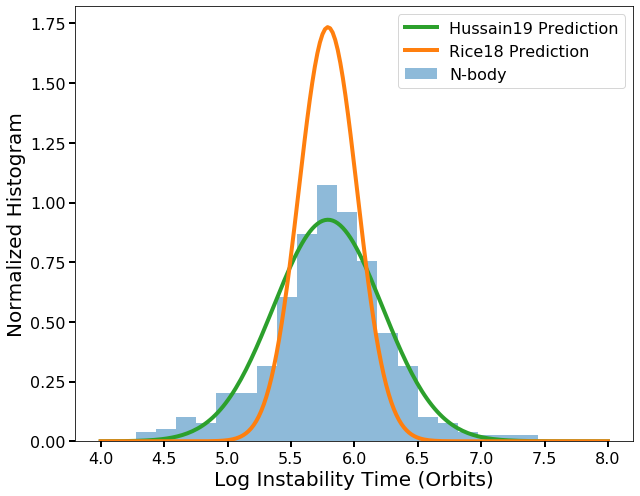

In [6]:
x = np.linspace(4, 8, 200)
times = np.log10(data["t"])

# Obtained from Figure3_Figure4_CombinedDistributions
sigmaH19 = 0.43
sigmaR18 = 0.23
cmap = plt.get_cmap("tab10")

fig, ax = plt.subplots(figsize=(10, 8))
mean = np.mean(times)
rvH19 = norm(loc = mean, scale = sigmaH19)
rvR18 = norm(loc = mean, scale = sigmaR18)
ax.hist(times, density=1, bins  =20, alpha = 0.5, label = "N-body")
cmap = plt.get_cmap("tab10")
ax.plot(x, rvH19.pdf(x), linewidth = 4, color = cmap(2), label= "Hussain19 Prediction")
ax.plot(x, rvR18.pdf(x), linewidth = 4, color = cmap(1), label= "Rice18 Prediction")
ax.set_ylabel("Normalized Histogram")
ax.set_xlabel("Log Instability Time (Orbits)")
ax.legend()
fig.savefig('fig6.pdf', bbox_inches='tight')

In [20]:
np.random.seed(0)
H19 = np.random.normal(loc=mean, scale=0.43, size = times.shape[0])
R18 = np.random.normal(loc=mean, scale=0.23, size = times.shape[0])
statistic, pvalH19 = ks_2samp(times, H19)
statistic, pvalR18 = ks_2samp(times, R18)

print("pval Hussain19 pred", pvalH19)
print("pval Rice18 pred", pvalR18)

pval Hussain19 pred 0.3293581065813255
pval Rice18 pred 3.826456804356892e-06
